<a href="https://colab.research.google.com/github/sarah-alhajri/Employee-Churn-Analysis-Project-/blob/main/Churn_Prediction_V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings.

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages.

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques.

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set.

Try to make your predictions by using the *** Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created.

#### 4. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 5. Model Deployement

- Save and Export the Best Model
- Deploy best model via Streamlit

## #Importing Modules and Predefined Functions#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pprint import pprint
from scipy.stats import chi2_contingency
from sklearn.metrics import jaccard_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('HR_Dataset.csv')
df.head()


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3        sales     low  
4        sales     low

## 1. Exploratory Data Analysis

In [5]:
df.shape

(14999, 10)

We have 10 columns and 14999 rows

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# remove space from column name and to lowercase to match the rest
df.rename(columns={'Departments ': 'departments'}, inplace=True)

In [8]:
df.describe().T

count        mean        std    min     25%     50%  \
satisfaction_level     14999.0    0.612834   0.248631   0.09    0.44    0.64   
last_evaluation        14999.0    0.716102   0.171169   0.36    0.56    0.72   
number_project         14999.0    3.803054   1.232592   2.00    3.00    4.00   
average_montly_hours   14999.0  201.050337  49.943099  96.00  156.00  200.00   
time_spend_company     14999.0    3.498233   1.460136   2.00    3.00    3.00   
Work_accident          14999.0    0.144610   0.351719   0.00    0.00    0.00   
left                   14999.0    0.238083   0.425924   0.00    0.00    0.00   
promotion_last_5years  14999.0    0.021268   0.144281   0.00    0.00    0.00   

                          75%    max  
satisfaction_level       0.82    1.0  
last_evaluation          0.87    1.0  
number_project           5.00    7.0  
average_montly_hours   245.00  310.0  
time_spend_company       4.00   10.0  
Work_accident            0.00    1.0  
left                     0.00    1.0  
promotion_last_5years    0.00    1.0

We have 3 encoded categorical columns [Work_accident, left, promotion_last_5years]

In [9]:
cat_cols = df.select_dtypes(include=['object']).columns # cat features
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
pprint(cat_cols)
print("Numerical Variables:")
pprint(num_cols)

Categorical Variables:
Index(['departments', 'salary'], dtype='object')
Numerical Variables:
['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']


In [10]:
# checking duplicated values
df.duplicated().sum()

3008

In [11]:
# dropping them
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [12]:
# checking null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
departments              0
salary                   0
dtype: int64

In [ ]:
# taking a look at departments column
df['departments'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: departments, dtype: int64

## 2. Data Visualization

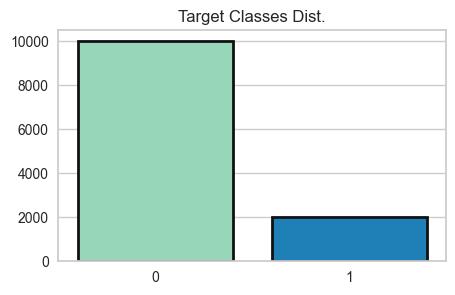

In [ ]:
c = df['left'].value_counts()

# visualizing our target distribution
plt.figure(figsize=(5, 3))
sns.barplot(x=c.index, y=c.values,
            saturation=1, edgecolor='k',
            linewidth=2, palette='YlGnBu')
plt.title(f'Target Classes Dist.')
plt.show()

The target classes are not balanced, we must handle the imbalnced issue. <br>
Common approaches:<br>
•	Focus on recall, precision, F1 scores for each class or (macro average)<br>
•	Use the class weight parameter to assign higher weights for the minority class<br>
During the modeling process we will try to improve the performance for class 1 since it has more value in this business problem since employees churn will introduce unexpected costs.

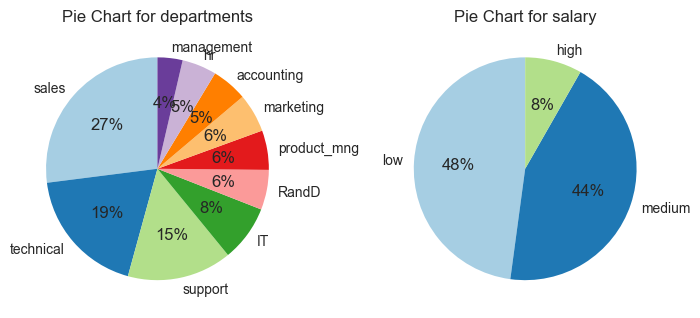

In [ ]:
#columns with non-numerical data types
non_numerical_columns = df.select_dtypes(exclude='number').columns

plt.figure(figsize=(18, 15))

for i, column in enumerate(non_numerical_columns):
    plt.subplot(2, 5, i + 1)

    value_counts = df[column].value_counts()

    plt.pie(value_counts, labels=value_counts.index, autopct='%1.0f%%',
            startangle=90, colors=sns.color_palette('Paired'))
    plt.title(f'Pie Chart for {column}')

plt.tight_layout()
plt.show()

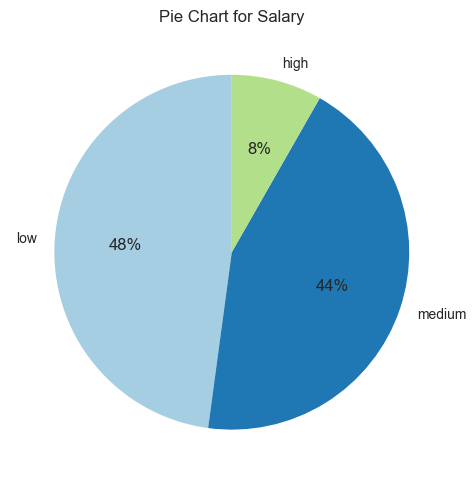

In [ ]:
plt.figure(figsize=(8, 5))
value_counts = df['salary'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.0f%%',
            startangle=90, colors=sns.color_palette('Paired'))
plt.title(f'Pie Chart for Salary')
plt.tight_layout()
plt.show()

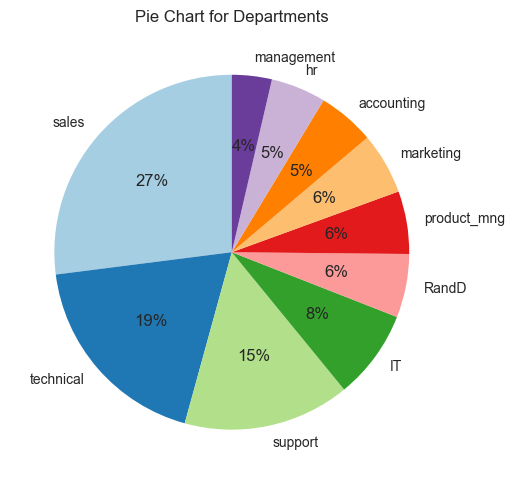

In [ ]:
plt.figure(figsize=(8, 5))
value_counts = df['departments'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.0f%%',
            startangle=90, colors=sns.color_palette('Paired'))
plt.title(f'Pie Chart for Departments')
plt.tight_layout()
plt.show()

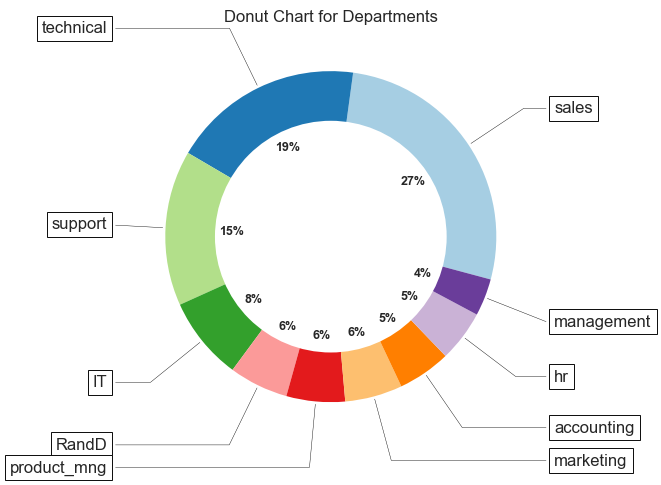

In [ ]:
# code from matplotlib docs:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1, 1, 1, aspect="equal")

value_counts = df['departments'].value_counts()

wedges, texts, autotexts = ax.pie(value_counts, wedgeprops=dict(width=0.5), startangle=-15,
                                 autopct='%1.0f%%', colors=plt.cm.Paired.colors,labeldistance=0.7)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for j, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(value_counts.index[j], xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment, **kw)

plt.setp(autotexts, size=9, weight='bold')
plt.setp(texts, size=10)

ax.set_title(f"Donut Chart for Departments")
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))

plt.tight_layout()
plt.show()

In [ ]:
# storing numerical without encoded columns
cols = ['satisfaction_level',
        'last_evaluation',
        'number_project',
        'average_montly_hours',
        'time_spend_company',
        'Work_accident',
        'promotion_last_5years']

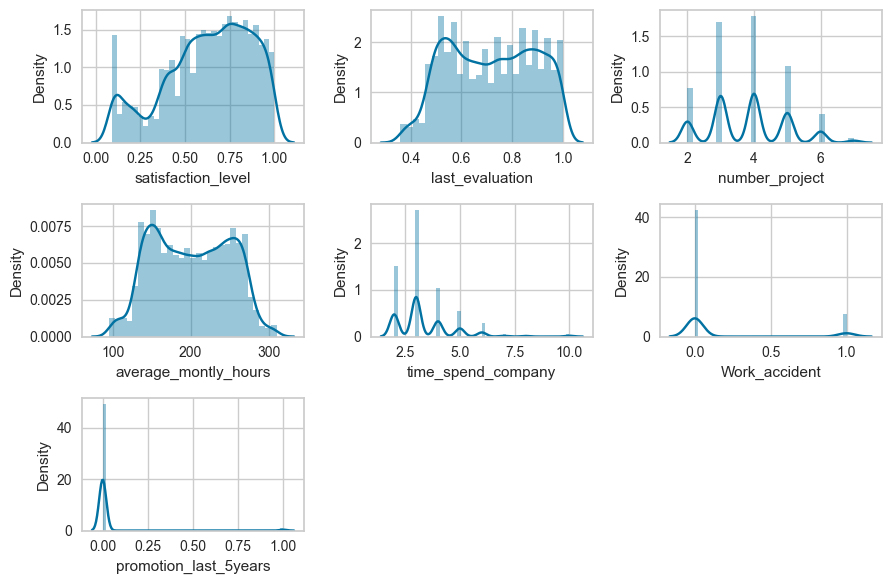

In [ ]:
plt.figure(figsize=(9, 6))
for i, column in enumerate(df[cols] , 1):
    plt.subplot(3,3,i)
    sns.distplot(df[column])
    plt.tight_layout()

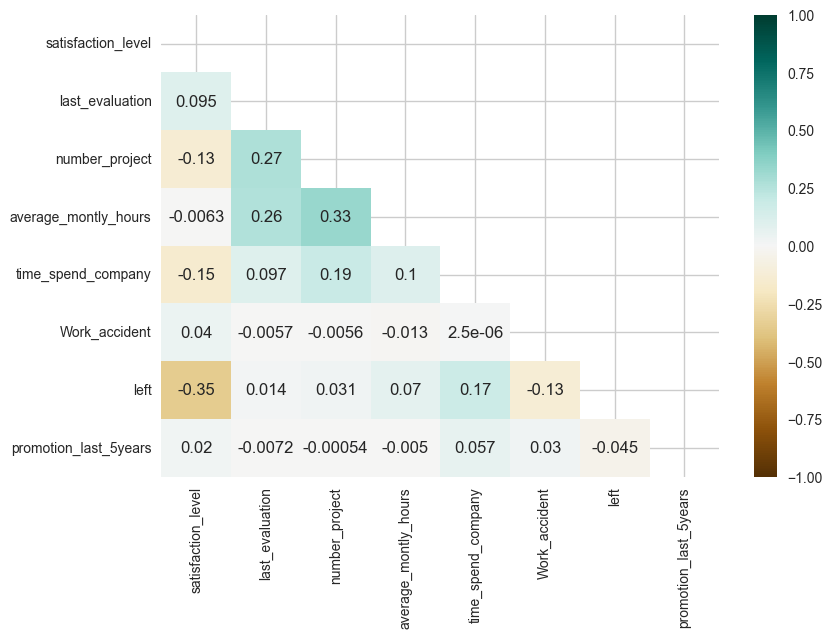

In [ ]:
plt.figure(figsize=(9, 6))
mask = np.triu(np.ones_like(df.corr())) #mask for the upper half
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG');

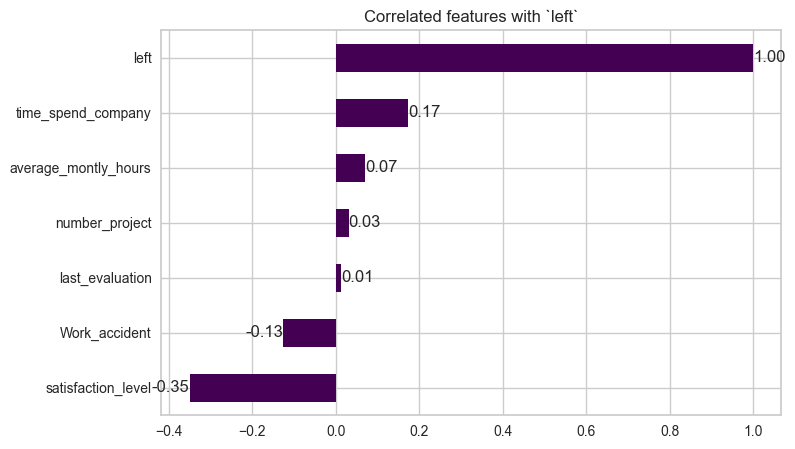

In [ ]:
#correlated features with `left` vs numaric columns
plt.figure(figsize=(8, 5))
ax = df.corr()['left'][:-1].sort_values().plot(kind='barh', colormap='viridis')
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.title('Correlated features with `left`');


-  `>` .5 or < -.5       high association

- .3 to .5 or -.3 to -.5  moderate association

- .1 to .3 or -.1 to -.3  low association

- -1 to 1   little if any association

Cramer’s V for categorical columns

In [ ]:
cat = ['Work_accident',
       'promotion_last_5years',
       'departments',
       'salary',
       'number_project',
       'time_spend_company',
       ]

In [ ]:
"""
This segment of code loops through the cat list above
to calculates Crammar's v and store it for later comparison
"""
v_values = []

for column in cat:
    tb = pd.crosstab(df[column], df['left'])
    chi2, _, _, _ = chi2_contingency(tb)
    n = tb.sum().sum()
    v = np.sqrt(chi2 / (n * min(tb.shape) - 1))
    v_values.append((column, v))

v_values.sort(key=lambda x: x[1], reverse=True)

table = pd.DataFrame(v_values,
                     columns=['column', 'v'])

In [ ]:
table.style.background_gradient(cmap='Blues')

Cramér's V is used to measure of association between two categorical variables. It's based on the chi-square and is mostly used to assess the strength of association between two categorical variables.

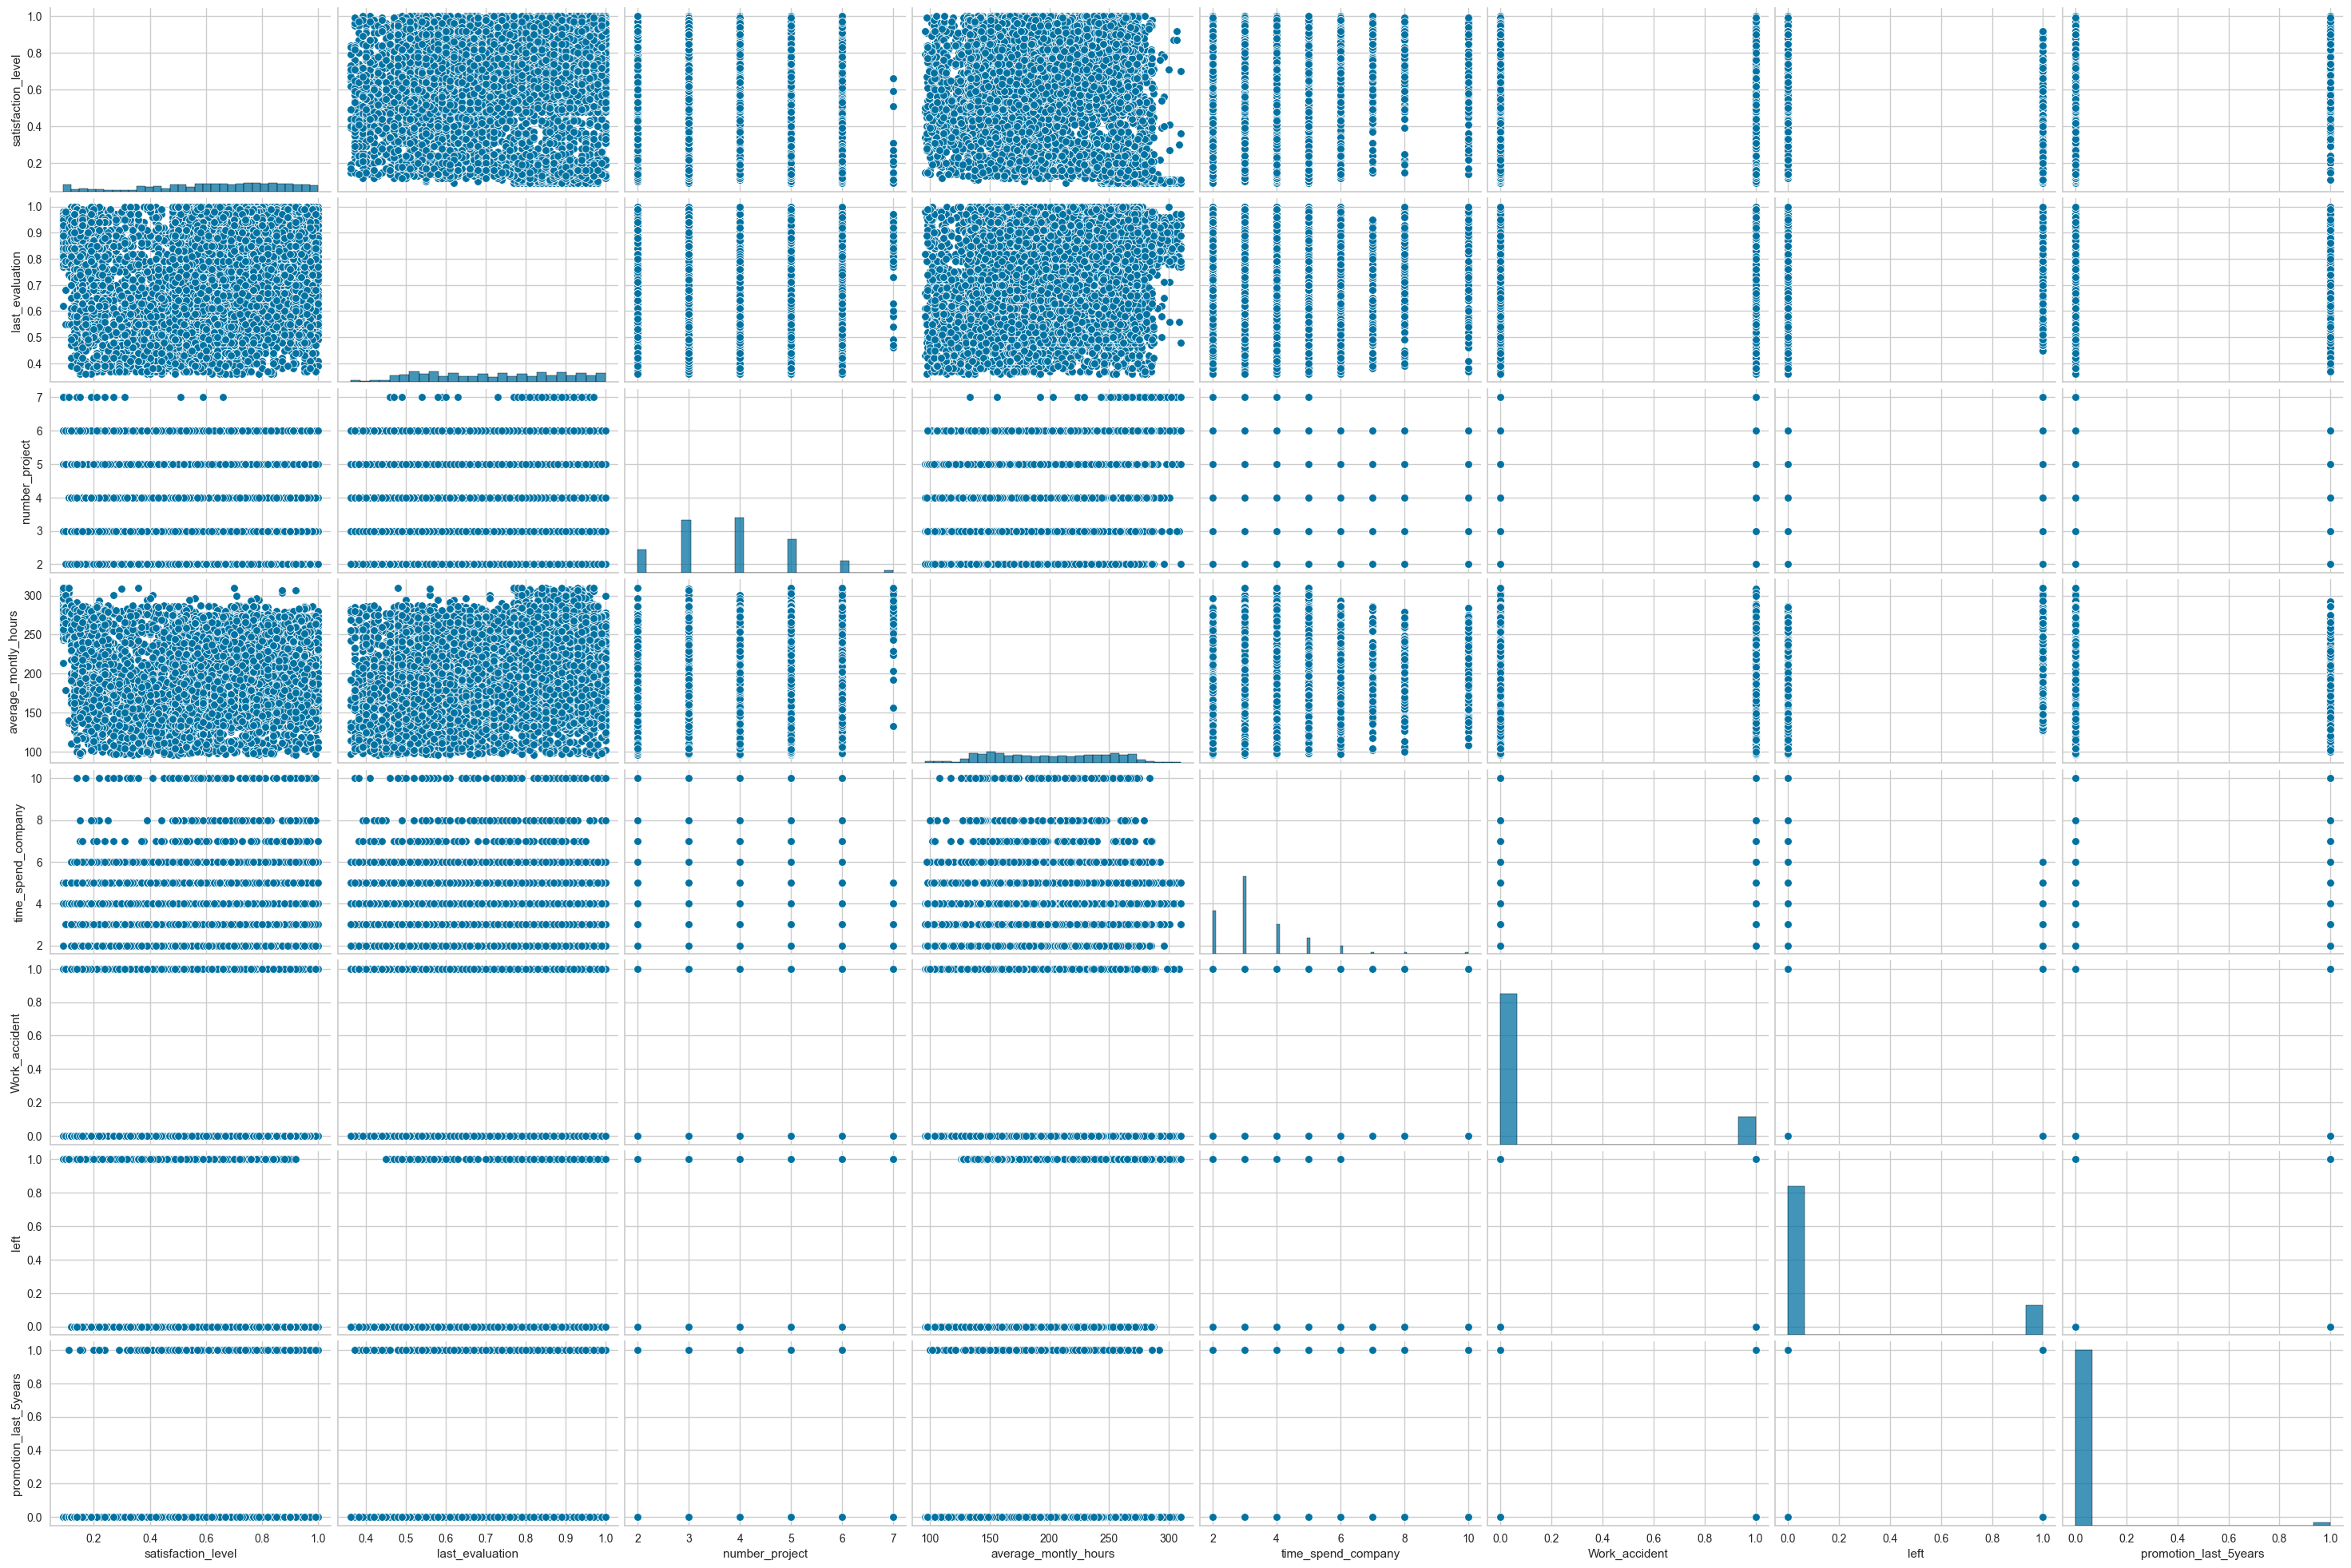

In [ ]:
sns.pairplot(df[num_cols] ,aspect=1.5);

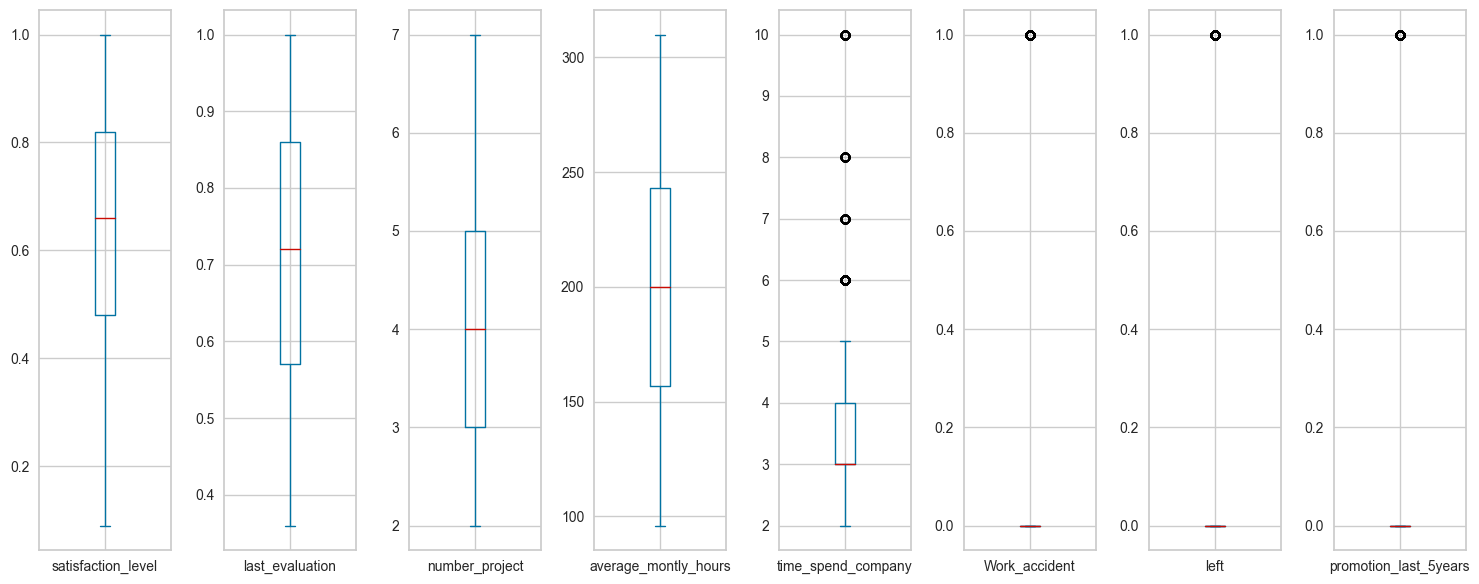

In [ ]:
df.plot( kind="box", subplots=True, figsize=(15, 6))
plt.tight_layout();

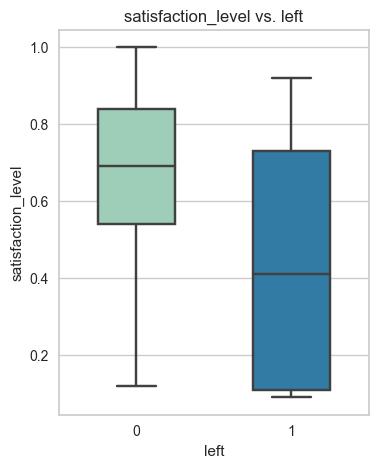

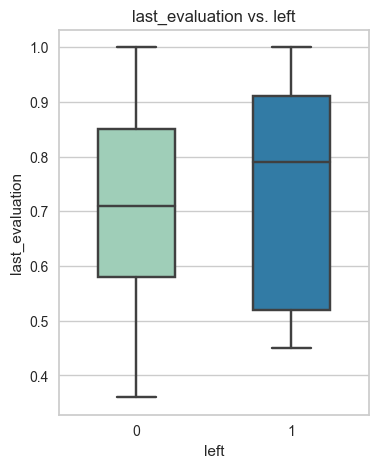

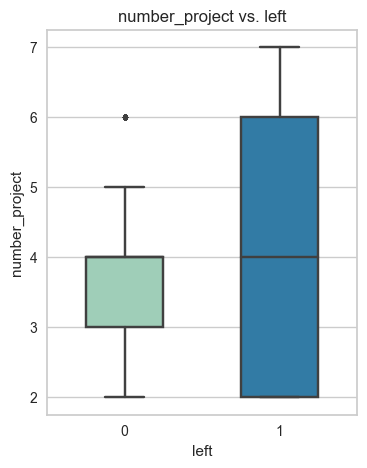

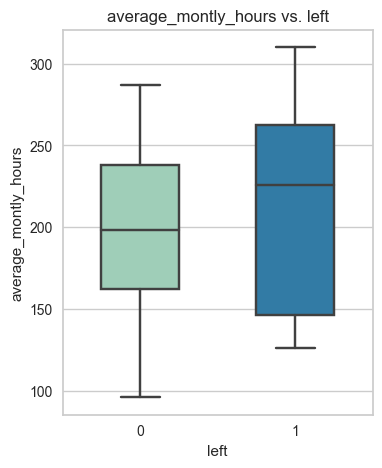

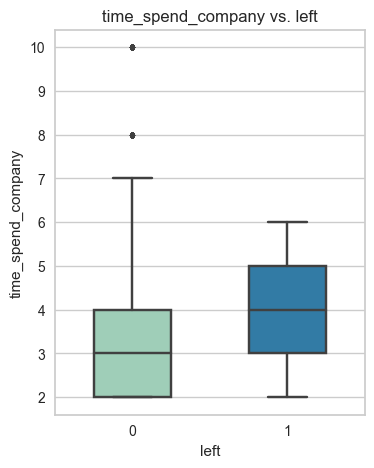

In [ ]:
# store numerical columns names except target feature and categorical features
columns = list(df.select_dtypes(include='number').columns)

columns.remove('left') # binary
columns.remove('Work_accident') # binary
columns.remove('promotion_last_5years') #binary

for column in columns:
    plt.figure(figsize=(4, 5))
    sns.boxplot(data=df, width=0.5, fliersize=3, y=column,
                x='left', palette = 'YlGnBu')
    plt.title(f'{column} vs. left')
    plt.show()
# No many outlier

In [ ]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','departments','salary']

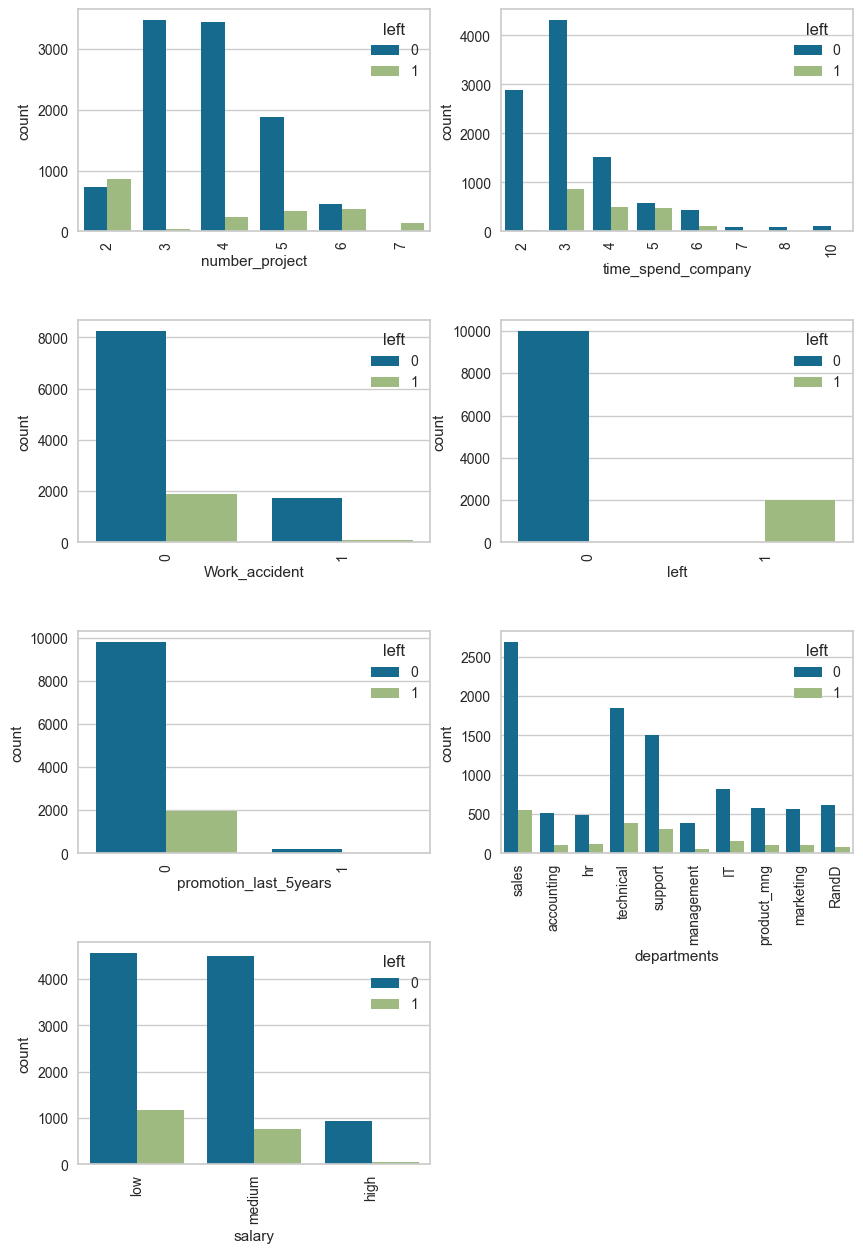

In [ ]:
# counf of fetures based on target

fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(df[features]):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.4)
    sns.countplot(x=j,data = df, hue='left')
    plt.xticks(rotation=90)

In [ ]:
df[df['time_spend_company'] > 7]['departments'].value_counts()

sales          53
management     43
support        19
marketing      16
technical      15
IT             13
accounting     12
product_mng     9
RandD           5
hr              3
Name: departments, dtype: int64

In [ ]:
df[df['number_project'] > 5]['departments'].value_counts()

sales          262
technical      206
support        139
IT              73
product_mng     61
RandD           56
accounting      51
marketing       46
hr              44
management      33
Name: departments, dtype: int64

In [ ]:
df[df['number_project'] == 7]["left"].value_counts()

1    145
Name: left, dtype: int64

all employees that had 7 project left the company

In [ ]:
df[df['promotion_last_5years'] == 1]['left'].value_counts()

0    195
1      8
Name: left, dtype: int64

most employees that had promotion do not left

# Preprocessing of Data

## Feature Selection

In [ ]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [ ]:
hopkins(df[['satisfaction_level' , 'average_montly_hours']], 1)

0.9755743917989494

In [ ]:
hopkins(df[['satisfaction_level' , 'last_evaluation']], 1)

0.8351355821284399

In [ ]:
hopkins(df[['satisfaction_level' , 'Work_accident']], 1)

1.0

In [ ]:
hopkins(df[['number_project' , 'time_spend_company']], 1)

0.9998173419131905

## 3. Cluster Analysis

### Kmeans

Because we already know the true labels are in two clusters, we will try to find the best model that segments the two clusters

In [ ]:
df_sn = df[['satisfaction_level' , 'average_montly_hours']].copy()
df_sn.head()

satisfaction_level  average_montly_hours
0                0.38                   157
1                0.80                   262
2                0.11                   272
3                0.72                   223
4                0.37                   159

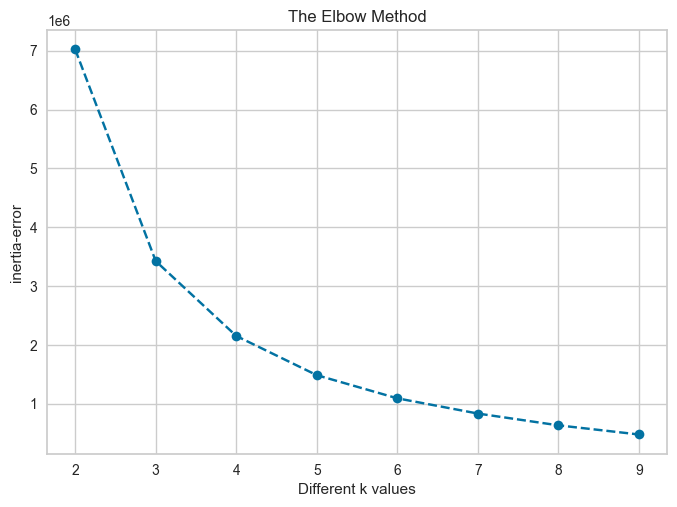

In [ ]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(df_sn)
    ssd.append(model.inertia_)
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("The Elbow Method");

In [ ]:
-pd.Series(ssd).diff()

0             NaN
1    3.596324e+06
2    1.271745e+06
3    6.662909e+05
4    3.935706e+05
5    2.586673e+05
6    2.005088e+05
7    1.553038e+05
dtype: float64

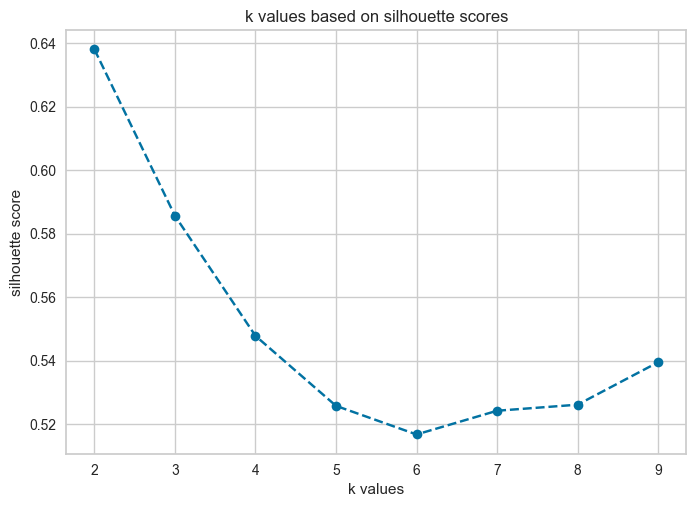

In [ ]:
scores = []
for n in K:
    kmeans = KMeans(n_clusters = n, random_state = 42)
    kmeans.fit(df_sn)
    cluster_labels = kmeans.labels_
        # silhouette score
    silhouette_avg = silhouette_score(df_sn, cluster_labels)
    scores.append(silhouette_avg)
plt.plot(K, scores, 'bo--')
plt.xlabel('k values')
plt.ylabel('silhouette score')
plt.title('k values based on silhouette scores');

In [ ]:
kmeans_model = KMeans(n_clusters = 2, random_state=42)
kmeans_model.fit_predict(df_sn)

array([0, 1, 1, ..., 0, 0, 0])

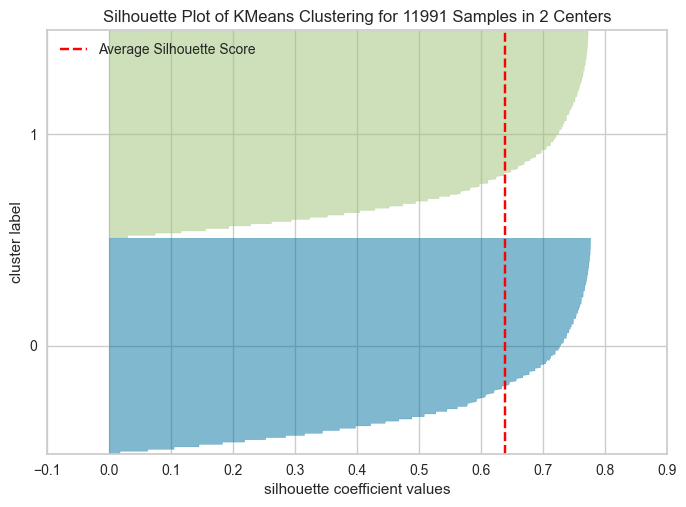

In [ ]:
visualizer = SilhouetteVisualizer(kmeans_model, colors='yellowbrick')
visualizer.fit(df_sn)
visualizer.show();

In [ ]:
clusters = kmeans_model.labels_

In [ ]:
km_with_label = df_sn = df[['satisfaction_level' , 'average_montly_hours', 'left']].copy()
km_with_label['Kmeans_clusters'] = clusters
km_with_label.head()

satisfaction_level  average_montly_hours  left  Kmeans_clusters
0                0.38                   157     1                0
1                0.80                   262     1                1
2                0.11                   272     1                1
3                0.72                   223     1                1
4                0.37                   159     1                0

In [ ]:
pd.crosstab(km_with_label["Kmeans_clusters"], km_with_label["left"])

left                0     1
Kmeans_clusters            
0                5212   910
1                4788  1081

In [ ]:
km_with_label["Kmeans_clusters"].value_counts()

0    6122
1    5869
Name: Kmeans_clusters, dtype: int64

In [ ]:
centers = kmeans_model.cluster_centers_
centers

array([[  0.622754  , 159.0645214 ],
       [  0.63685977, 243.6675754 ]])

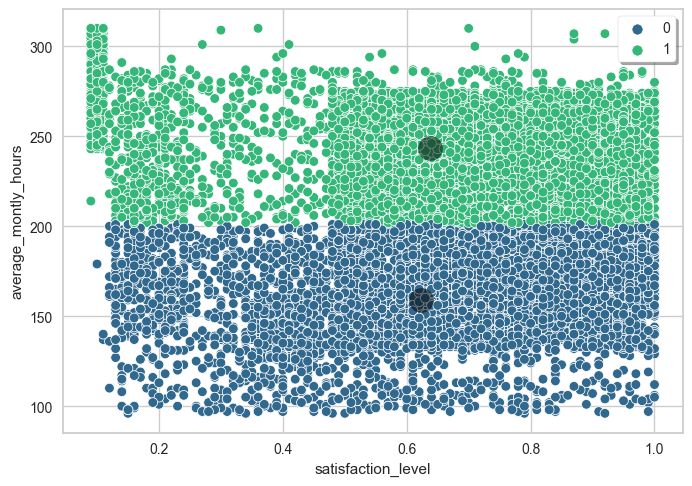

In [ ]:
sns.scatterplot(x="satisfaction_level",
            y="average_montly_hours",
            data =df_sn,
            hue="Kmeans_clusters",
            palette='viridis')

plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=300,
            alpha=0.5)
plt.legend(loc='best' ,frameon=True ,shadow=True);

In [ ]:
kmeans_sa = adjusted_rand_score(km_with_label["Kmeans_clusters"], km_with_label["left"])
kmeans_sa

0.0022179681292398205

the scores are too bad, meaning that the clusters not similar to actual

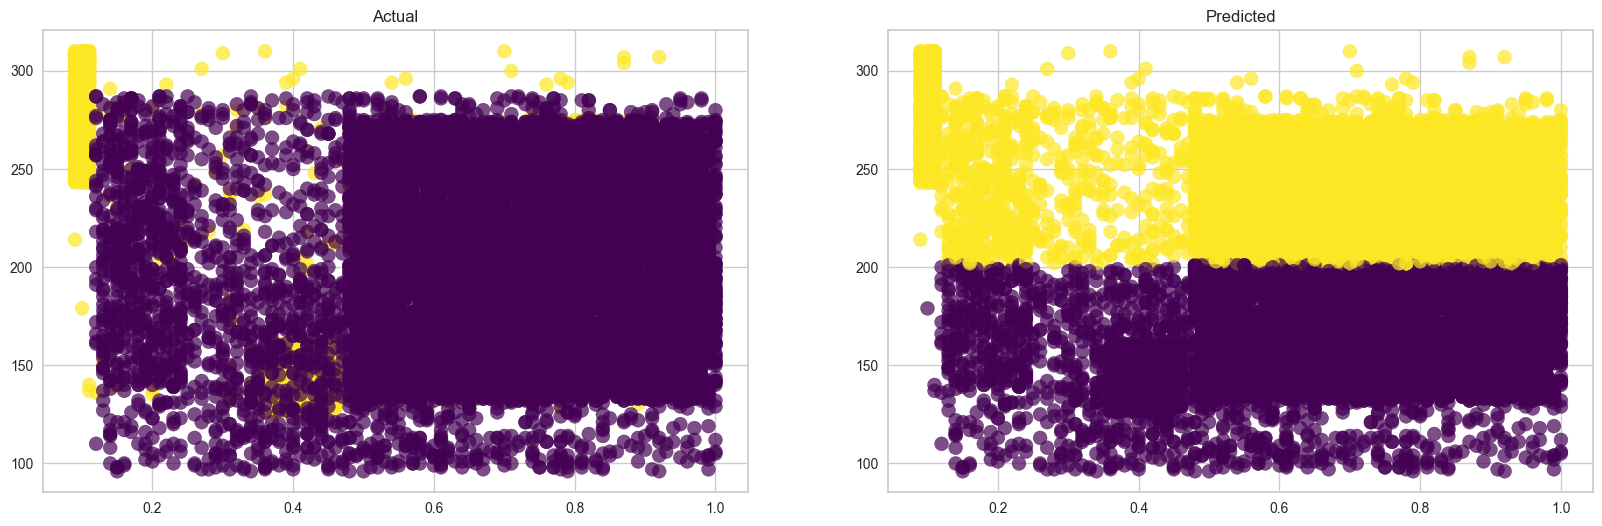

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(121)
plt.scatter(km_with_label["satisfaction_level"],
            km_with_label["average_montly_hours"],
            c=km_with_label["left"],
            cmap="viridis",
            alpha=0.7,
            s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(km_with_label["satisfaction_level"],
            km_with_label["average_montly_hours"],
            c=km_with_label["Kmeans_clusters"],
            cmap="viridis",
            alpha=0.7,
            s=100)
plt.title("Predicted");

### 2nd df

In [ ]:
df_sl = df[['satisfaction_level' , 'last_evaluation']]
kmeans_model = KMeans(n_clusters = 2, random_state=42)
kmeans_model.fit_predict(df_sl)

array([1, 0, 1, ..., 0, 1, 1])

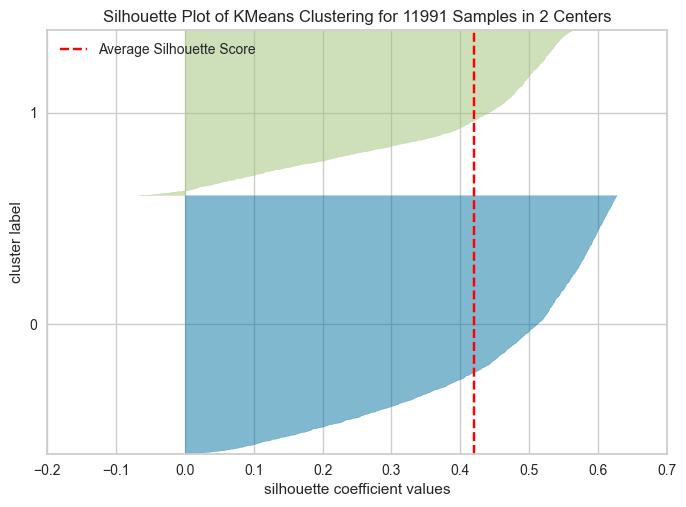

In [ ]:
visualizer = SilhouetteVisualizer(kmeans_model, colors='yellowbrick')
visualizer.fit(df_sl)
visualizer.show();

In [ ]:
clusters = kmeans_model.labels_
km_with_label = df[['satisfaction_level' , 'last_evaluation', 'left']].copy()
km_with_label['Kmeans_clusters'] = clusters
km_with_label.head()

satisfaction_level  last_evaluation  left  Kmeans_clusters
0                0.38             0.53     1                1
1                0.80             0.86     1                0
2                0.11             0.88     1                1
3                0.72             0.87     1                0
4                0.37             0.52     1                1

In [ ]:
pd.crosstab(km_with_label["Kmeans_clusters"], km_with_label["left"])

left                0     1
Kmeans_clusters            
0                6769   557
1                3231  1434

In [ ]:
km_with_label["Kmeans_clusters"].value_counts()

0    7326
1    4665
Name: Kmeans_clusters, dtype: int64

In [ ]:
centers = kmeans_model.cluster_centers_
centers

array([[0.7874117 , 0.75382517],
       [0.38130957, 0.65820953]])

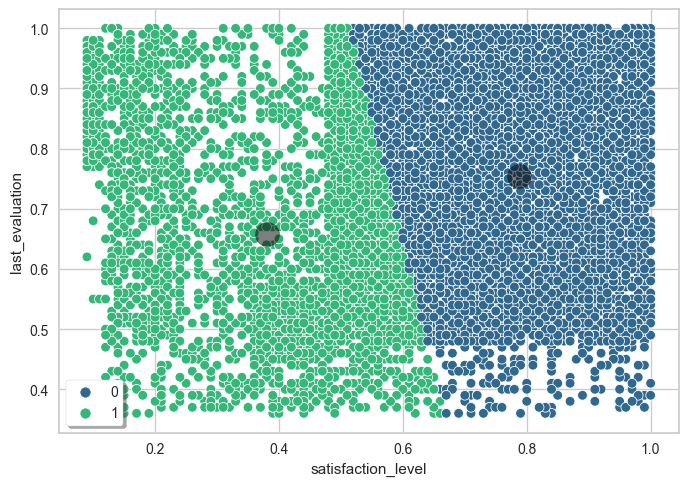

In [ ]:
sns.scatterplot(x="satisfaction_level",
            y="last_evaluation",
            data =km_with_label,
            hue="Kmeans_clusters",
            palette='viridis')

plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=300,
            alpha=0.5)
plt.legend(loc='best' ,frameon=True ,shadow=True);

In [ ]:
km_sl = adjusted_rand_score(km_with_label["Kmeans_clusters"], km_with_label["left"])
km_sl

0.11610826210363569

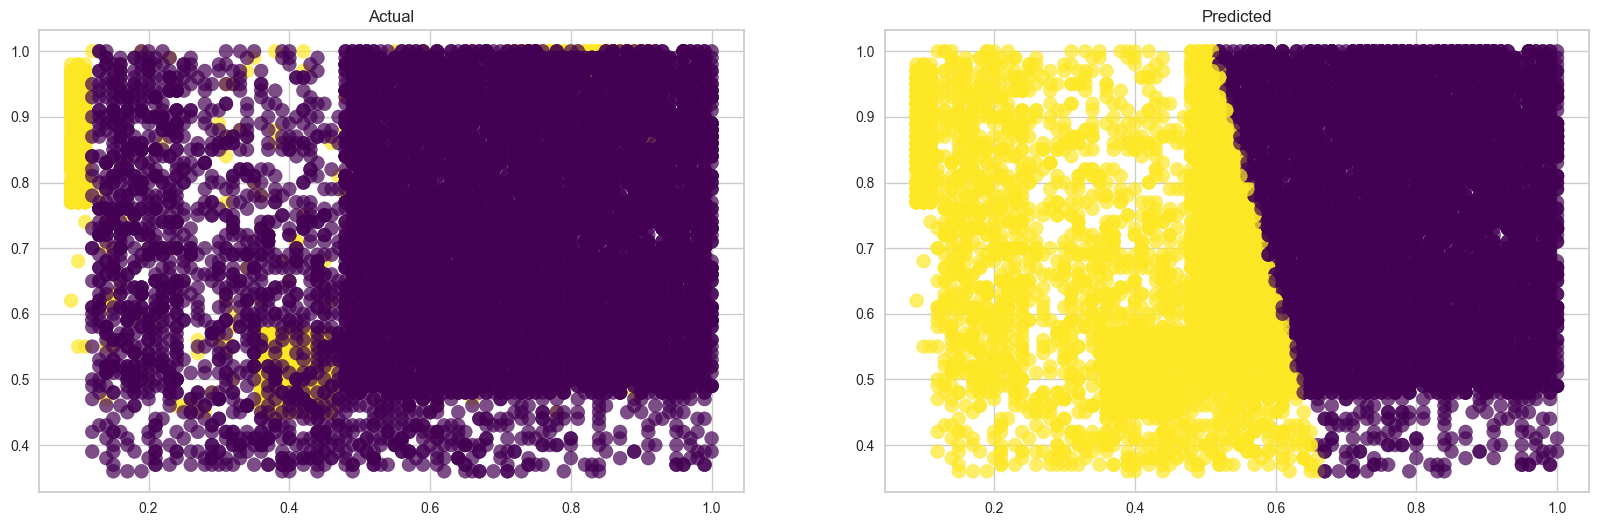

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(121)
plt.scatter(km_with_label["satisfaction_level"],
            km_with_label["last_evaluation"],
            c=km_with_label["left"],
            cmap="viridis",
            alpha=0.7,
            s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(km_with_label["satisfaction_level"],
            km_with_label["last_evaluation"],
            c=km_with_label["Kmeans_clusters"],
            cmap="viridis",
            alpha=0.7,
            s=100)
plt.title("Predicted");

We can conclode that kmeans is not suitable for this problem

## AgglomerativeClustering

In [ ]:
df_cat1 = df[['number_project' , 'time_spend_company']]

In [ ]:
hc_ward = linkage(df_cat1, method = "ward")
hc_complete = linkage(df_cat1, "complete")
hc_average = linkage(df_cat1, "average")
hc_single = linkage(df_cat1, "single")

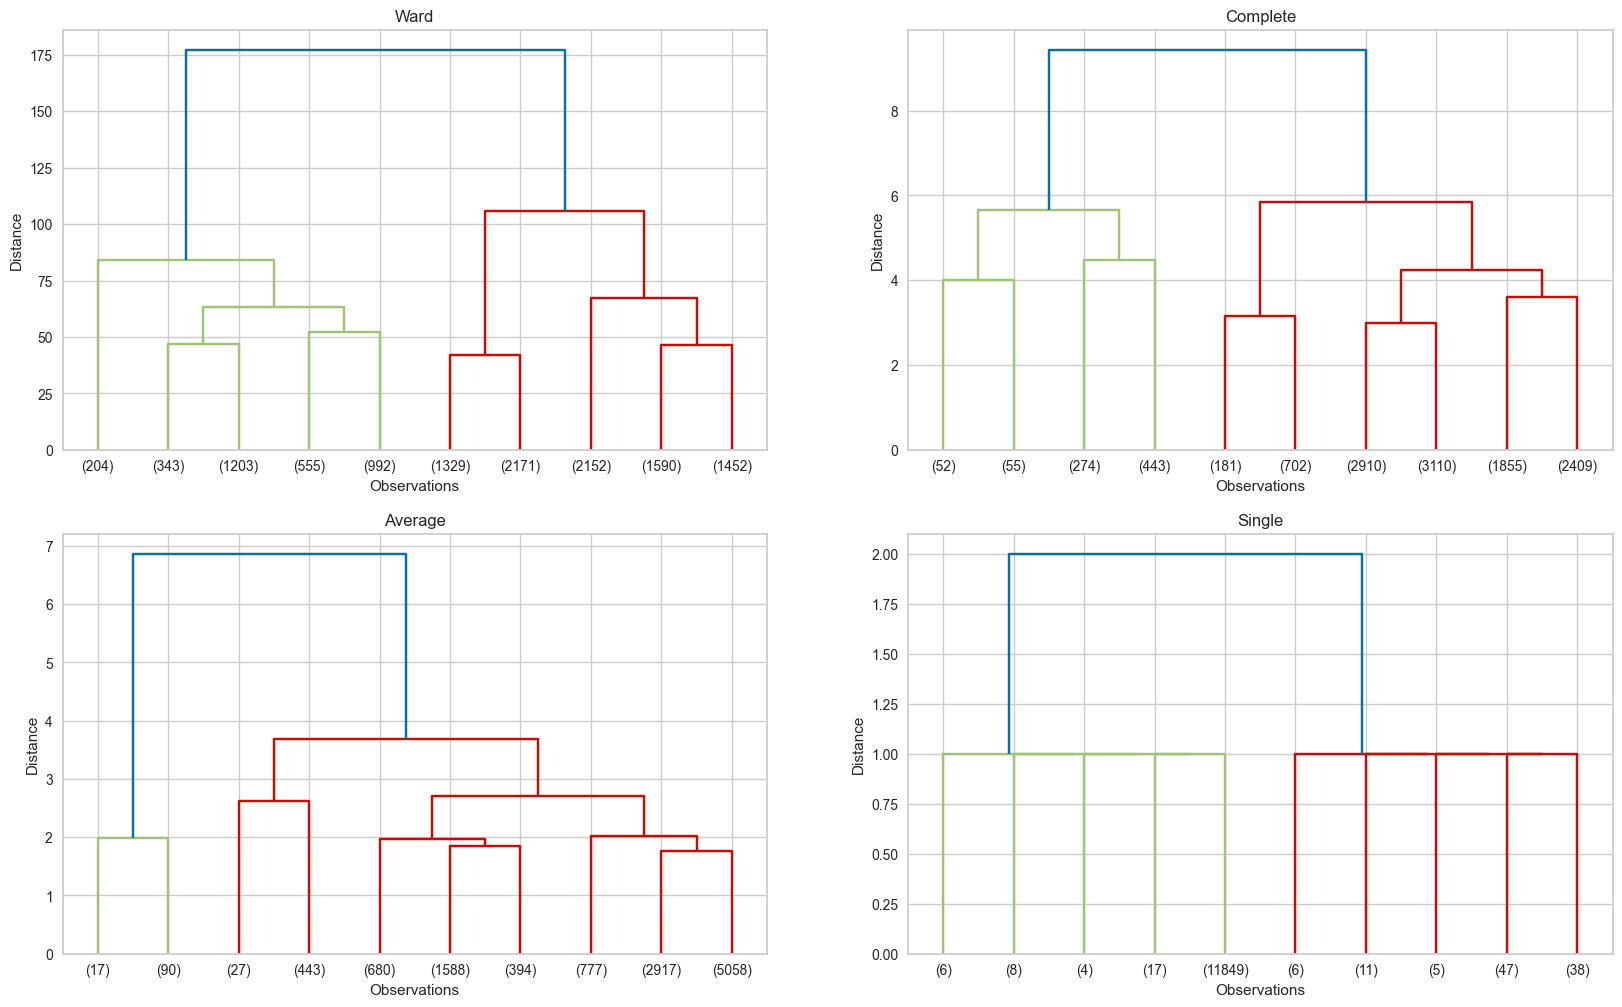

In [ ]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [ ]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k, linkage="ward")
    model.fit_predict(df_cat1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df_cat1, model.labels_)}')

Silhouette Score for 2 clusters: 0.5234778572418718
Silhouette Score for 3 clusters: 0.40980057617563426
Silhouette Score for 4 clusters: 0.40078226975661246
Silhouette Score for 5 clusters: 0.3843436711491027
Silhouette Score for 6 clusters: 0.2930539327825654
Silhouette Score for 7 clusters: 0.2925103344436198
Silhouette Score for 8 clusters: 0.35447515375179867
Silhouette Score for 9 clusters: 0.3309754186225332


In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2,
                                linkage="ward")
clusters = model.fit_predict(df_cat1)

In [ ]:
clusters = model.labels_
cat2 = df[['number_project' , 'time_spend_company' , 'left']].copy()
cat2['labels'] = clusters
cat2.head()

number_project  time_spend_company  left  labels
0               2                   3     1       0
1               5                   6     1       1
2               7                   4     1       1
3               5                   5     1       1
4               2                   3     1       0

In [ ]:
pd.crosstab(cat2["labels"], cat2["left"])

left       0     1
labels            
0       7766   928
1       2234  1063

In [ ]:
cat2["labels"].value_counts()

0    8694
1    3297
Name: labels, dtype: int64

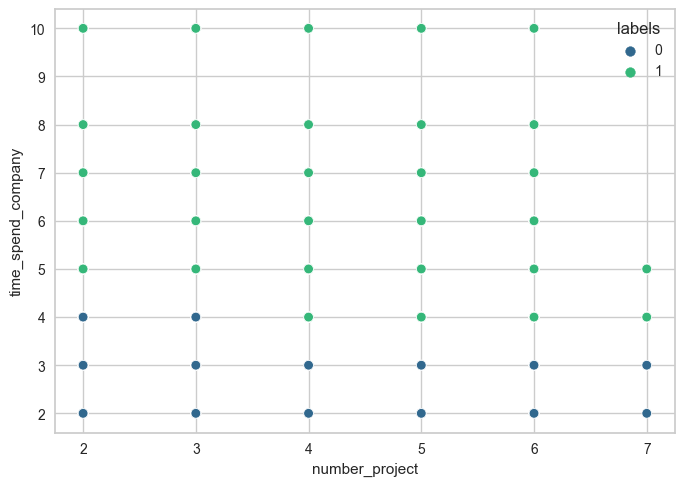

In [ ]:
sns.scatterplot(x="number_project",
            y="time_spend_company",
            data =cat2,
            hue="labels",
            palette='viridis');

In [ ]:
agg_cat = adjusted_rand_score(cat2["labels"], cat2["left"])
agg_cat

0.1461591601923089

## Cluster results

In [ ]:
agg_cat

0.1461591601923089

In [ ]:
Model = ["kmeans1",'kmeans2' "hierarchical"]
rand_score = [kmeans_sa, km_sl, agg_cat]


compare = pd.DataFrame({'Model': Model,
                   'rand_score': rand_score })

compare

ValueError: All arrays must be of the same length

## 4. Predictive Model Building

### Preprocessing

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [ ]:
df['time_spend_company'].value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

In [60]:
!pip install scikit-plot

In [61]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score , accuracy_score
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
from scikitplot.metrics import plot_roc, plot_precision_recall ,roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model
from sklearn.model_selection import cross_validate
import xgboost as xgb
from xgboost import XGBClassifier

In [15]:
one_hot_columns = ['departments', 'Work_accident', 'promotion_last_5years']
ordinal_columns = ['salary','number_project', 'time_spend_company']

sal_order = ['low', 'medium', 'high']
project_order = [2,3,4,5,6,7]
time_order = [2,3,4,5,6,7,8,10]
ordinal = [sal_order, project_order, time_order]

In [16]:
#column transformer

column_trans = make_column_transformer((
               OneHotEncoder( handle_unknown='ignore',
                              sparse_output=False),
                              one_hot_columns),
              (OrdinalEncoder(categories=ordinal,
                              handle_unknown='use_encoded_value',
                              unknown_value=-1),
                              ordinal_columns),
                              remainder = 'passthrough')

 ## Train | Test Splitting

In [17]:
# splitting X and y
X = df.drop(columns = ['left'])
y = df['left']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

________________________________________________________________________________________________________________________________________________________________________________________________

## Scoring

In [24]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    '''
    Description:
    This function gets a model, train and test sets and return
    the confusion matrix and classification report

    INPUT:
    model - fitted model
    X_train - input features for the training set
    y_train - target values for training set
    X_test - input features for the testing set
    y_test - target values for testing set

    RETURN:
    Nothing

    '''
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print()
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [25]:
f1 = make_scorer(f1_score, average=None, labels=[1])

precision = make_scorer(precision_score, average=None, labels=[1])

recall= make_scorer(recall_score, average=None, labels=[1])


scoring = {'f1_1': f1,
           'precision_1': precision,
           'recall_1': recall}

In [27]:
def precision_recall_plot(model,X_test, y_test):
  y_pred_proba = model.predict_proba(X_test)

  plot_precision_recall(y_test, y_pred_proba)
  plt.show();

#### Min Max Scaler

In [29]:
# our scaller
sc = MinMaxScaler()

________________________________________________________________________________________________________________________________________________________________

### Classification Algorithms
 - Try at least 4 ML/DL algorithms.

#### Logistic Regression Model

In [32]:
# Logistic regression model
logistic_model = LogisticRegression(max_iter=1000,class_weight="balanced", random_state=42)
# setting max iteration to 1000 for multiclass to make sure solvers have enough iterations to converge
log_pipe = make_pipeline(column_trans, sc, logistic_model)

log_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['departments',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high'],
                                                                             [2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7],
                                                                             [2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              10]],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary', 'number_project',
                                                   'time_spend_company'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

#### Model Evaluation

In [33]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[6080 1919]
 [ 274 1319]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      7999
           1       0.41      0.83      0.55      1593

    accuracy                           0.77      9592
   macro avg       0.68      0.79      0.70      9592
weighted avg       0.87      0.77      0.80      9592


Test_Set
[[1542  459]
 [  61  337]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      2001
           1       0.42      0.85      0.56       398

    accuracy                           0.78      2399
   macro avg       0.69      0.81      0.71      2399
weighted avg       0.87      0.78      0.81      2399



In [38]:
scores = cross_validate(log_pipe,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_1            0.546376
train_f1_1           0.545640
test_precision_1     0.407864
train_precision_1    0.407124
test_recall_1        0.828007
train_recall_1       0.827021
dtype: float64

* precision score for class one is bad need to improve it
* Recall is the best score

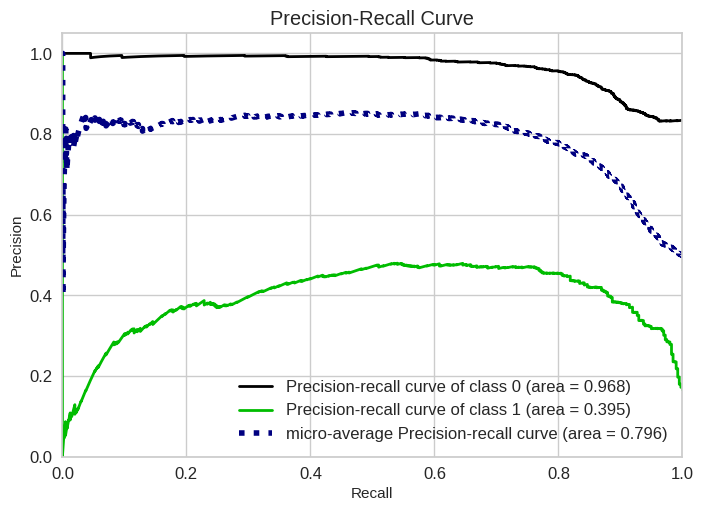

In [68]:
precision_recall_plot(log_pipe,X_test, y_test)

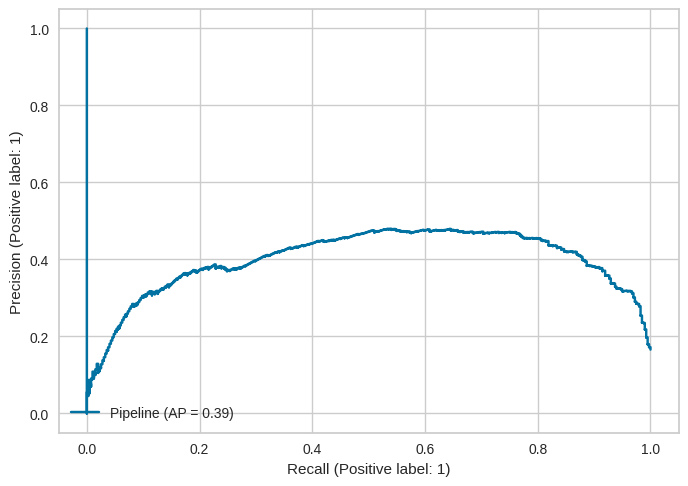

In [67]:
PrecisionRecallDisplay.from_estimator(log_pipe,
                                      X_test,
                                      y_test);

In [70]:
# save and store the scores to visualize them later
y_pred = log_pipe.predict(X_test)
y_pred_proba= log_pipe.predict_proba(X_test)[:,1]

log_AP= average_precision_score(y_test, y_pred_proba)
log_recall = recall_score(y_test, y_pred)
log_f1 = f1_score(y_test,y_pred)

#### Naive Bayes Model

In [41]:
help(BernoulliNB)

Help on class BernoulliNB in module sklearn.naive_bayes:

class BernoulliNB(_BaseDiscreteNB)
 |  BernoulliNB(*, alpha=1.0, force_alpha='warn', binarize=0.0, fit_prior=True, class_prior=None)
 |  
 |  Naive Bayes classifier for multivariate Bernoulli models.
 |  
 |  Like MultinomialNB, this classifier is suitable for discrete data. The
 |  difference is that while MultinomialNB works with occurrence counts,
 |  BernoulliNB is designed for binary/boolean features.
 |  
 |  Read more in the :ref:`User Guide <bernoulli_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float or array-like of shape (n_features,), default=1.0
 |      Additive (Laplace/Lidstone) smoothing parameter
 |      (set alpha=0 and force_alpha=True, for no smoothing).
 |  
 |  force_alpha : bool, default=False
 |      If False and alpha is less than 1e-10, it will set alpha to
 |      1e-10. If True, alpha will remain unchanged. This may cause
 |      numerical errors if alpha is too close to 0.
 |  
 |   

In [49]:
# Naive_bayes model
Naive_model = BernoulliNB(alpha=0.8)
# setting max iteration to 1000 for multiclass to make sure solvers have enough iterations to converge
naive_pipe = make_pipeline(column_trans, sc, Naive_model)

naive_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['departments',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high'],
                                                                             [2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7],
                                                                             [2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              10]],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary', 'number_project',
                                                   'time_spend_company'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('bernoullinb', BernoulliNB(alpha=0.8))])

#### Model Evaluation

In [50]:
eval_metric(naive_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[7663  336]
 [ 885  708]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7999
           1       0.68      0.44      0.54      1593

    accuracy                           0.87      9592
   macro avg       0.79      0.70      0.73      9592
weighted avg       0.86      0.87      0.86      9592


Test_Set
[[1915   86]
 [ 193  205]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2001
           1       0.70      0.52      0.60       398

    accuracy                           0.88      2399
   macro avg       0.81      0.74      0.76      2399
weighted avg       0.87      0.88      0.88      2399



In [51]:
scores = cross_validate(naive_pipe,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_1            0.533996
train_f1_1           0.536411
test_precision_1     0.679378
train_precision_1    0.679838
test_recall_1        0.441274
train_recall_1       0.442979
dtype: float64

* Recall score is the worst
* Precision is the best score

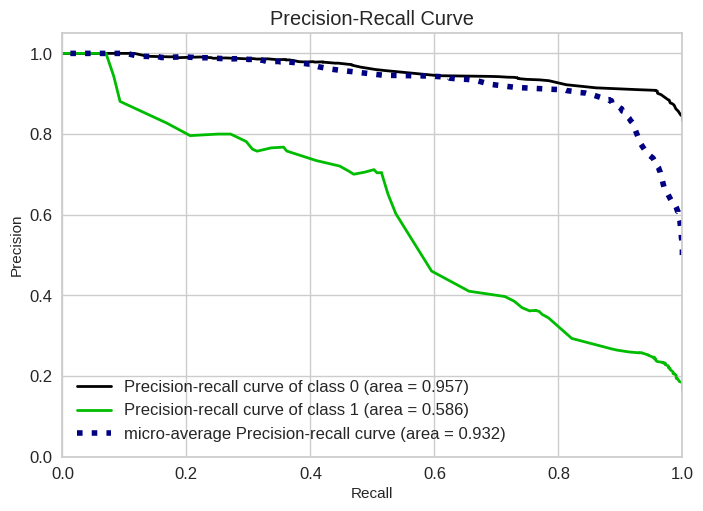

In [65]:
precision_recall_plot(naive_pipe,X_test, y_test)

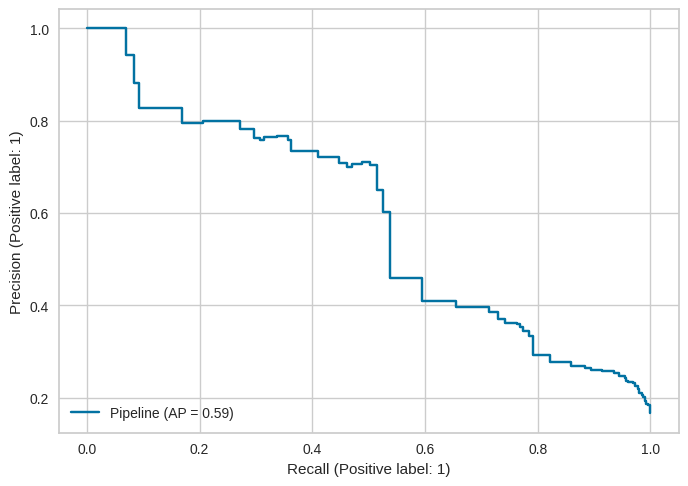

In [66]:
PrecisionRecallDisplay.from_estimator(naive_pipe,
                                      X_test,
                                      y_test);

In [71]:
# save and store the scores to visualize them later
y_pred = naive_pipe.predict(X_test)
y_pred_proba= naive_pipe.predict_proba(X_test)[:,1]

naive_AP= average_precision_score(y_test, y_pred_proba)
naive_recall = recall_score(y_test, y_pred)
naive_f1 = f1_score(y_test,y_pred)

_________________________________________________________________________________________________________________________________________________________________

#### XGBoost Model

In [55]:
# Naive_bayes model
xgb_model = XGBClassifier()
# setting max iteration to 1000 for multiclass to make sure solvers have enough iterations to converge
xgb_pipe = make_pipeline(column_trans, sc, xgb_model)

xgb_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['departments',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high'],
                                                                             [2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7],
                                                                             [2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              10]],
                                                                 handle_unknown='use_e...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

#### Model Evaluation

In [56]:
eval_metric(xgb_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[7993    6]
 [  33 1560]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      0.98      0.99      1593

    accuracy                           1.00      9592
   macro avg       1.00      0.99      0.99      9592
weighted avg       1.00      1.00      1.00      9592


Test_Set
[[1987   14]
 [  28  370]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.96      0.93      0.95       398

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



In [57]:
scores = cross_validate(xgb_pipe,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_1            0.944815
train_f1_1           0.989038
test_precision_1     0.971680
train_precision_1    0.996250
test_recall_1        0.919638
train_recall_1       0.981935
dtype: float64

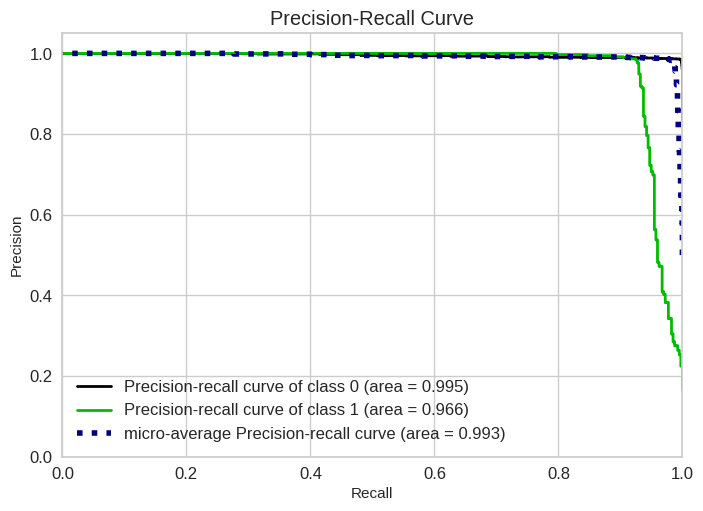

In [63]:
precision_recall_plot(xgb_pipe,X_test, y_test)

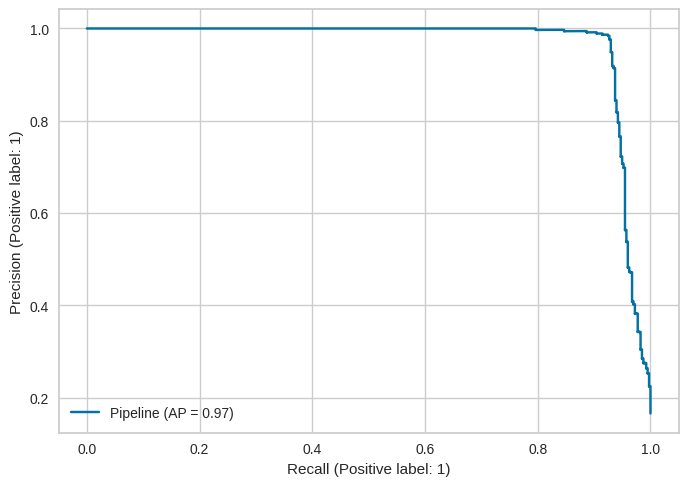

In [64]:
PrecisionRecallDisplay.from_estimator(xgb_pipe,
                                      X_test,
                                      y_test);

In [72]:
# save and store the scores to visualize them later
y_pred = xgb_pipe.predict(X_test)
y_pred_proba= xgb_pipe.predict_proba(X_test)[:,1]

xgb_AP= average_precision_score(y_test, y_pred_proba)
xgb_recall = recall_score(y_test, y_pred)
xgb_f1 = f1_score(y_test,y_pred)

#### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

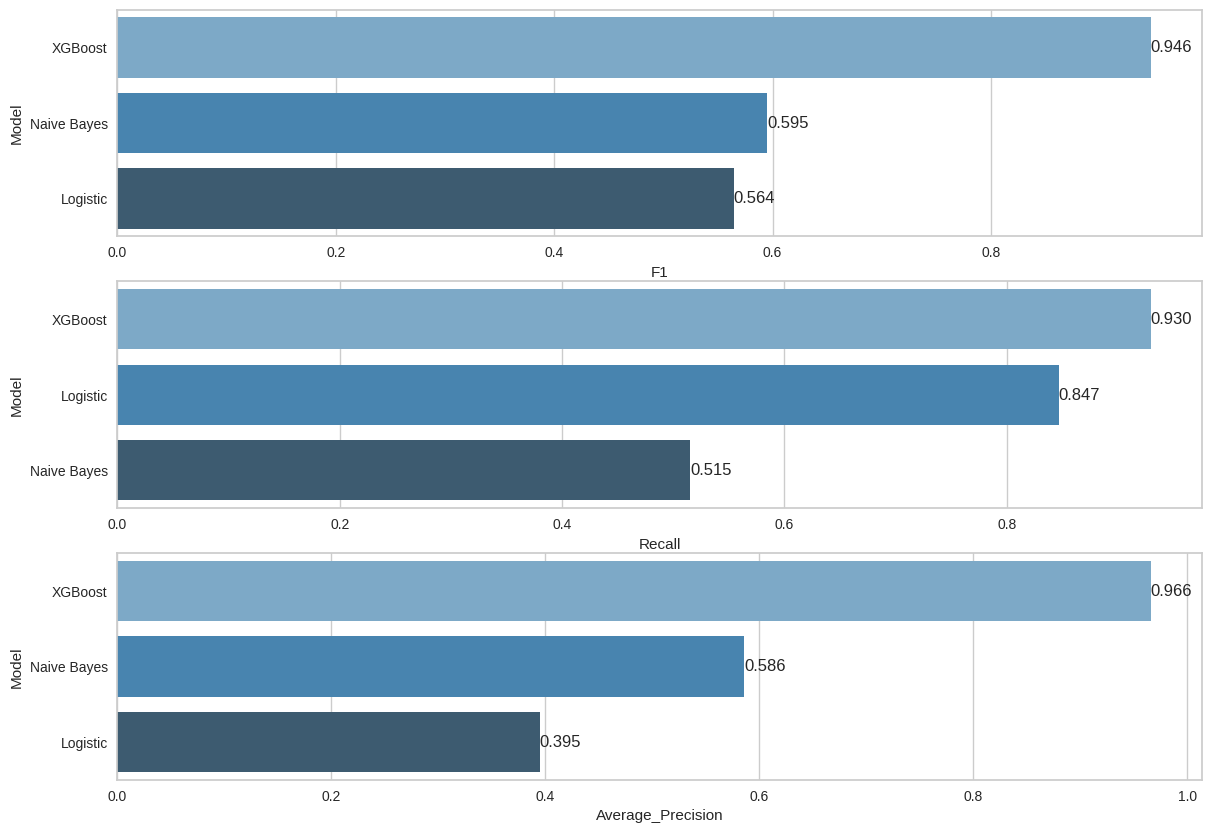

In [74]:
compare = pd.DataFrame({"Model": ["Logistic","Naive Bayes", "XGBoost"],
                        "F1": [log_f1, naive_f1, xgb_f1],
                        "Recall": [log_recall, naive_recall, xgb_recall],
                        "Average_Precision": [log_AP, naive_AP, xgb_AP]})


plt.figure(figsize=(14,10))

plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="Average_Precision", ascending=False)
ax=sns.barplot(x="Average_Precision", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show()

#### Model Building

####  Prediction

## 5. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Best Model

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___